In [1]:
import pandas as pd
pd.set_option('display.max_rows', 100)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import string
from collections import defaultdict
import numpy as np

from nltk import tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore", category=Warning)

plt.style.use('ggplot')
%matplotlib inline

# What is Hamilton the musical about?

In [2]:
df = pd.read_csv("ham_lyrics.csv",encoding = 'utf-8')

In [3]:
df.head(5)

,label,title,speaker,lines
0,1,Alexander Hamilton,BURR,"How does a bastard, orphan, son of a whore and a"
1,1,Alexander Hamilton,BURR,"Scotsman, dropped in the middle of a forgotten"
2,1,Alexander Hamilton,BURR,"Spot in the Caribbean by providence, impoveris..."
3,1,Alexander Hamilton,BURR,Grow up to be a hero and a scholar?
4,1,Alexander Hamilton,LAURENS,The ten-dollar Founding Father without a father


## Explore in General

所有的歌

In [4]:
allsongs = df["title"].unique()
allsongs

array(['Alexander Hamilton', 'Aaron Burr, Sir', 'My Shot',
       'The Story of Tonight', 'The Schuyler Sisters', 'Farmer Refuted',
       "You'll Be Back", 'Right Hand Man', "A Winter's Ball", 'Helpless',
       'Satisfied', 'The Story of Tonight (Reprise)', 'Wait For It',
       'Stay Alive', 'Ten Duel Commandments', 'Meet Me Inside',
       'That Would Be Enough', 'Guns and Ships',
       'History Has Its Eyes On You',
       'Yorktown (The World Turned Upside Down)', 'What Comes Next?',
       'Dear Theodosia', 'Non-Stop', "What'd I Miss", 'Cabinet Battle #1',
       'Take A Break', 'Say No To This', 'The Room Where It Happens',
       'Schuyler Defeated', 'Cabinet Battle #2',
       'Washington On Your Side', 'One Last Time', 'I Know Him',
       'The Adams Administration', 'We Know', 'Hurricane', 'Burn',
       'Blow Us All Away', 'Stay Alive (Reprise)', "It's Quiet Uptown",
       'The Election of 1800', 'Your Obedient Servant',
       'Best of Wives and Best of Women', 'The Wor

查看某一首歌的信息

In [5]:
df[df["title"] == 'Alexander Hamilton'].head(3)

,label,title,speaker,lines
0,1,Alexander Hamilton,BURR,"How does a bastard, orphan, son of a whore and a"
1,1,Alexander Hamilton,BURR,"Scotsman, dropped in the middle of a forgotten"
2,1,Alexander Hamilton,BURR,"Spot in the Caribbean by providence, impoveris..."


歌曲相对占比

In [6]:
tit = df["title"]
tit.value_counts(normalize=True)[:5]

The Room Where It Happens    0.057237
Non-Stop                     0.053660
My Shot                      0.051734
Right Hand Man               0.048982
Satisfied                    0.046230
Name: title, dtype: float64

Main Characters?

In [7]:
sp = df["speaker"]
sp.value_counts(normalize=True)[:10]

HAMILTON       0.225647
BURR           0.144194
ELIZA          0.076500
WASHINGTON     0.066318
COMPANY        0.056412
ANGELICA       0.049807
JEFFERSON      0.045129
ENSEMBLE       0.041827
KING GEORGE    0.024766
PHILIP         0.023665
Name: speaker, dtype: float64

查看每首歌对应的歌词

In [8]:
t_l = df.loc[:,["title","lines"]]
t_l.head(3)

,title,lines
0,Alexander Hamilton,"How does a bastard, orphan, son of a whore and a"
1,Alexander Hamilton,"Scotsman, dropped in the middle of a forgotten"
2,Alexander Hamilton,"Spot in the Caribbean by providence, impoveris..."


song 与 label 建立字典、形成映射

In [9]:
la_tit = df.loc[:,["label","title"]]
la_tit = la_tit.drop_duplicates().reset_index(drop=True)
l_sdic = defaultdict(list)
# s_ldic = defaultdict(int)
la_tit
for indexs in la_tit.index:
    l_sdic[la_tit.loc[indexs]["label"]].append(la_tit.loc[indexs]["title"])
dict(l_sdic)
# for indexs in la_tit.index:
#     s_ldic[la_tit.loc[indexs]["title"]] = int(la_tit.loc[indexs]["label"])
# dict(s_ldic)

{1: ['Alexander Hamilton',
  'Aaron Burr, Sir',
  'My Shot',
  'The Story of Tonight',
  'The Schuyler Sisters',
  'Farmer Refuted'],
 2: ["You'll Be Back",
  'Right Hand Man',
  "A Winter's Ball",
  'Helpless',
  'Satisfied',
  'The Story of Tonight (Reprise)',
  'Wait For It'],
 3: ['Stay Alive',
  'Ten Duel Commandments',
  'Meet Me Inside',
  'That Would Be Enough',
  'Guns and Ships',
  'History Has Its Eyes On You',
  'Yorktown (The World Turned Upside Down)'],
 4: ['What Comes Next?',
  'Dear Theodosia',
  'Non-Stop',
  "What'd I Miss",
  'Cabinet Battle #1',
  'Take A Break',
  'Say No To This'],
 5: ['The Room Where It Happens',
  'Schuyler Defeated',
  'Cabinet Battle #2',
  'Washington On Your Side',
  'One Last Time',
  'I Know Him'],
 6: ['The Adams Administration',
  'We Know',
  'Hurricane',
  'Burn',
  'Blow Us All Away'],
 7: ['Stay Alive (Reprise)',
  "It's Quiet Uptown",
  'The Election of 1800',
  'Your Obedient Servant',
  'Best of Wives and Best of Women',
  'The 

ham为title与lines的映射

In [10]:
ham = defaultdict(dict)
t_l = df.groupby(by="title")
for i,j in t_l:
    liststr = list(j["lines"])
    st = ' '.join(str(i) for i in liststr)
    ham[i] = st
ham = dict(ham)

## Sentiment Analysis

### 将每首歌的所有歌词作为一个整体

textblob为工具

源码：https://textblob.readthedocs.io/en/dev/_modules/textblob/en/sentiments.html

In [11]:
sen = []

for song in allsongs:
    a = str(ham[song])
    blob = TextBlob(a)
    sen.append(blob.sentiment[0])

分段分颜色查看趋势（主要为了观察方便）

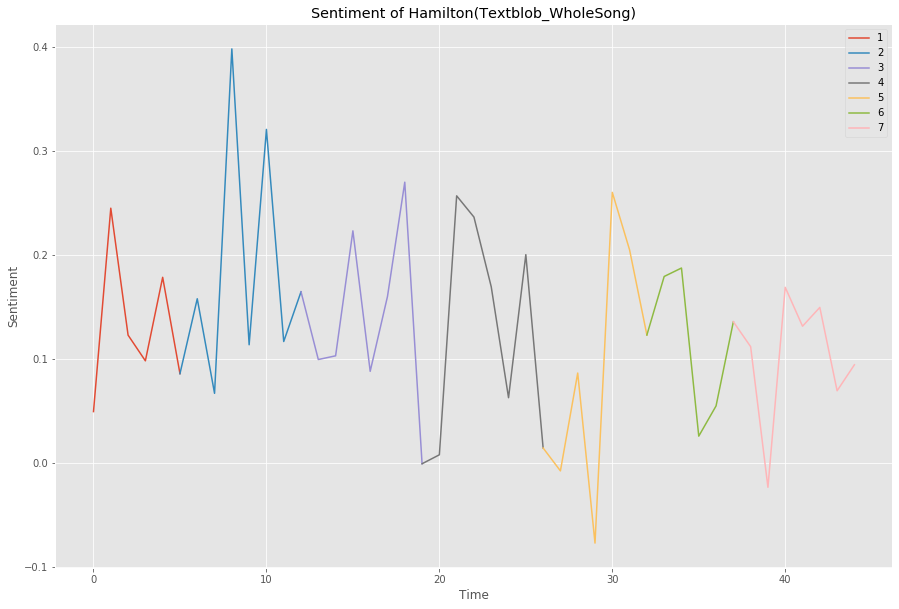

In [12]:
x = range(len(sen))
y = sen
plt.figure(figsize=(15, 10))
# plt.plot(x,y,c=sns.xkcd_rgb['coral'],label=lb)
index = 0
lb = 1
while(lb<=7):
    sn = l_sdic[lb]
    if(index == 0):
        plt.plot(x[index:index+len(sn)],y[index:index+len(sn)],label=lb)
    else:
        plt.plot(x[index-1:index+len(sn)],y[index-1:index+len(sn)],label=lb)
    index = index + len(sn)
    lb = lb + 1

plt.legend(loc='best')
plt.title('Sentiment of Hamilton(Textblob_WholeSong)')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

查看每首歌对应的情感极性值

In [13]:
i = 0
for i in range(len(sen)):
    print("{:-<50} {}".format(allsongs[i], str(int(sen[i]*1000)/1000)))

Alexander Hamilton-------------------------------- 0.049
Aaron Burr, Sir----------------------------------- 0.244
My Shot------------------------------------------- 0.122
The Story of Tonight------------------------------ 0.098
The Schuyler Sisters------------------------------ 0.178
Farmer Refuted------------------------------------ 0.085
You'll Be Back------------------------------------ 0.157
Right Hand Man------------------------------------ 0.066
A Winter's Ball----------------------------------- 0.398
Helpless------------------------------------------ 0.113
Satisfied----------------------------------------- 0.32
The Story of Tonight (Reprise)-------------------- 0.116
Wait For It--------------------------------------- 0.164
Stay Alive---------------------------------------- 0.099
Ten Duel Commandments----------------------------- 0.102
Meet Me Inside------------------------------------ 0.223
That Would Be Enough------------------------------ 0.088
Guns and Ships------------------

vader为工具

In [14]:
analyzer = SentimentIntensityAnalyzer()
sen2 = []
for song in allsongs:
    vs = analyzer.polarity_scores(str(ham[song])) # dict
    sen2.append(vs['compound'])

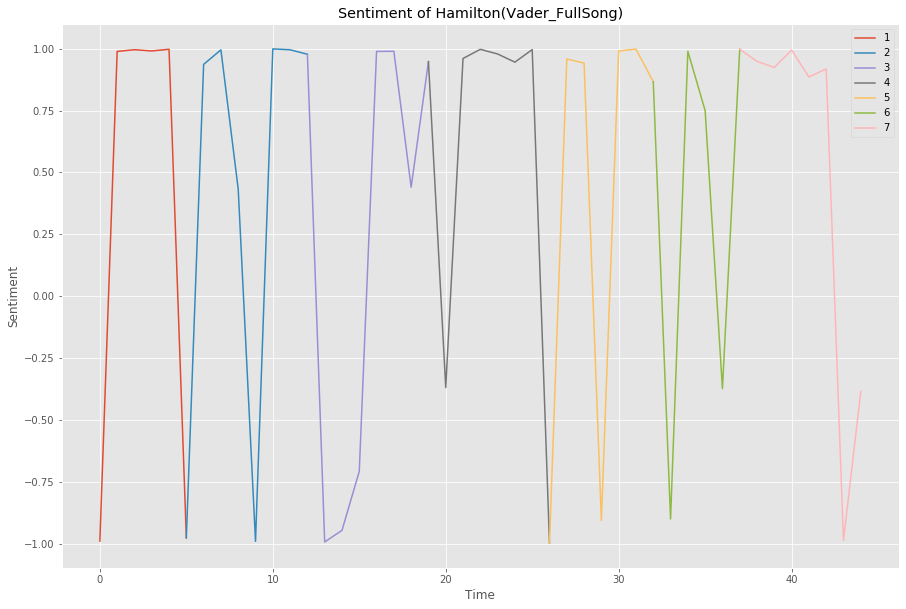

In [15]:
x = range(len(sen2))
y = sen2
plt.figure(figsize=(15, 10))

index = 0
lb = 1
while(lb<=7):
    sn = l_sdic[lb]
    if(index == 0):
        plt.plot(x[index:index+len(sn)],y[index:index+len(sn)],label=lb)
    else:
        plt.plot(x[index-1:index+len(sn)],y[index-1:index+len(sn)],label=lb)
    index = index + len(sn)
    lb = lb + 1

plt.legend(loc='best')
plt.title('Sentiment of Hamilton(Vader_FullSong)')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

图象不理想，改进？

### 分句后取均值

In [16]:
sens = []
for song in allsongs:
    sdf = df[df["title"] == song]
    senscore = 0
    for indexs in sdf.index:
        a = str(sdf.loc[indexs]["lines"])
        blob = TextBlob(a)
        senscore+=blob.sentiment[0]
    senscore =  senscore/len(sdf)
    sens.append(senscore)

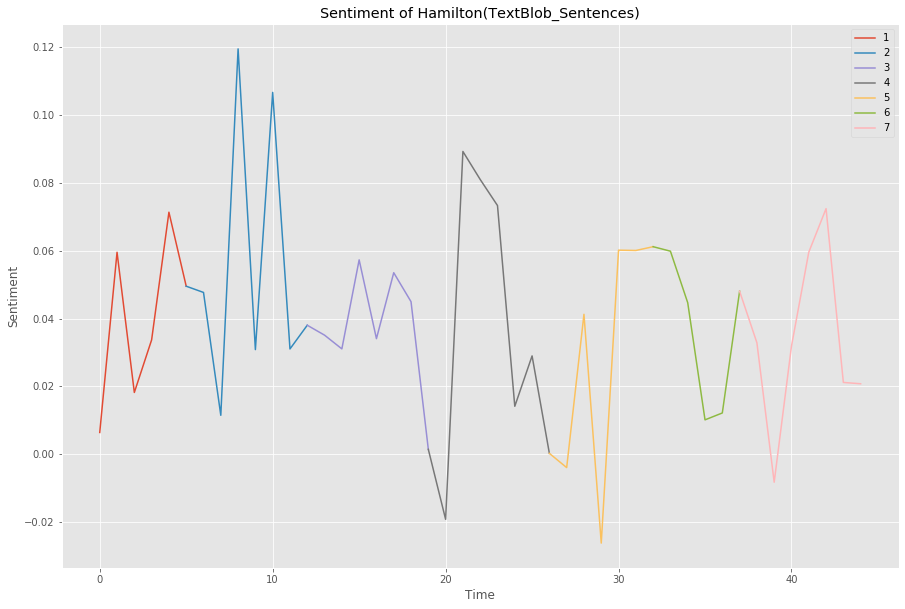

In [17]:
x = range(len(sens))
y = sens
plt.figure(figsize=(15, 10))

index = 0
lb = 1
while(lb<=7):
    sn = l_sdic[lb]
    if(index == 0):
        plt.plot(x[index:index+len(sn)],y[index:index+len(sn)],label=lb)
    else:
        plt.plot(x[index-1:index+len(sn)],y[index-1:index+len(sn)],label=lb)
    index = index + len(sn)
    lb = lb + 1

plt.legend(loc='best')
plt.title('Sentiment of Hamilton(TextBlob_Sentences)')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

平滑一点？

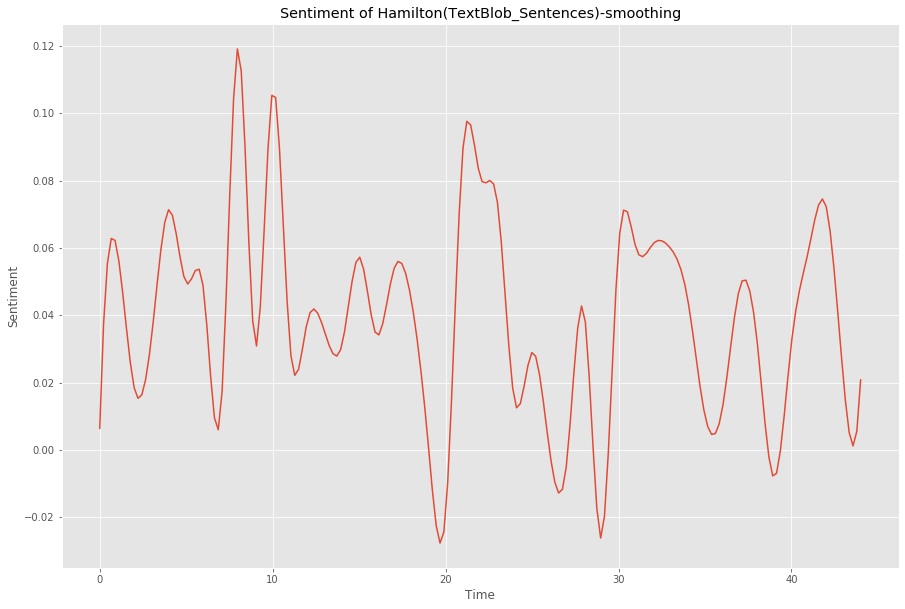

In [18]:
x = range(len(sens))
y = sens

from scipy.interpolate import spline
 
xnew = np.linspace(min(x),max(x),200)
y_smooth = spline(x,y,xnew)

plt.figure(figsize=(15, 10))
plt.plot(xnew,y_smooth)
plt.title('Sentiment of Hamilton(TextBlob_Sentences)-smoothing')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

使用rolling mean, 并尝试使用axes

(0, 50)

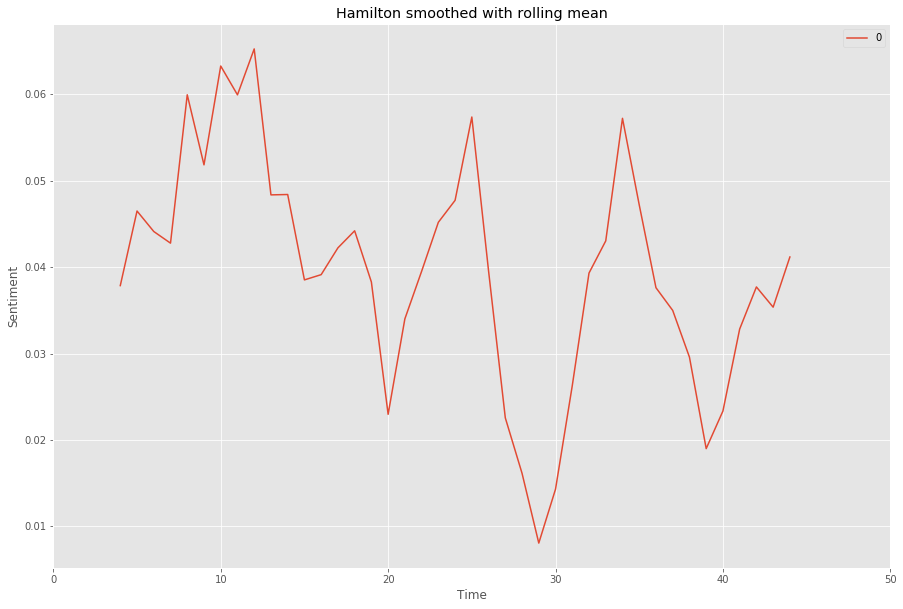

In [19]:
df_temp = pd.DataFrame(sens) 
df_roll = df_temp.rolling(5).mean()
ax = df_roll.plot(figsize = (15, 10))
ax.set_xlabel("Time")
ax.set_ylabel("Sentiment")
ax.set_title("Hamilton smoothed with rolling mean")
ax.set_xlim((0, 50))

In [20]:
sens1 = []
sentis = { 'neg': [],  'pos': []}
analyzer = SentimentIntensityAnalyzer()
for song in allsongs:
    sdf = df[df["title"] == song]
    senscore = senneg = senpos = 0
    for indexs in sdf.index:
        a = str(sdf.loc[indexs]["lines"])
        vs = analyzer.polarity_scores(a)
        senscore+=vs['compound']
        senneg += vs['neg']
        senpos += vs['pos']
    senscore =  senscore/len(sdf)
    senneg = senneg / len(sdf)
    senpos = senpos / len(sdf)
    sens1.append(senscore)
    sentis['neg'].append(senneg)
    sentis['pos'].append(senpos)

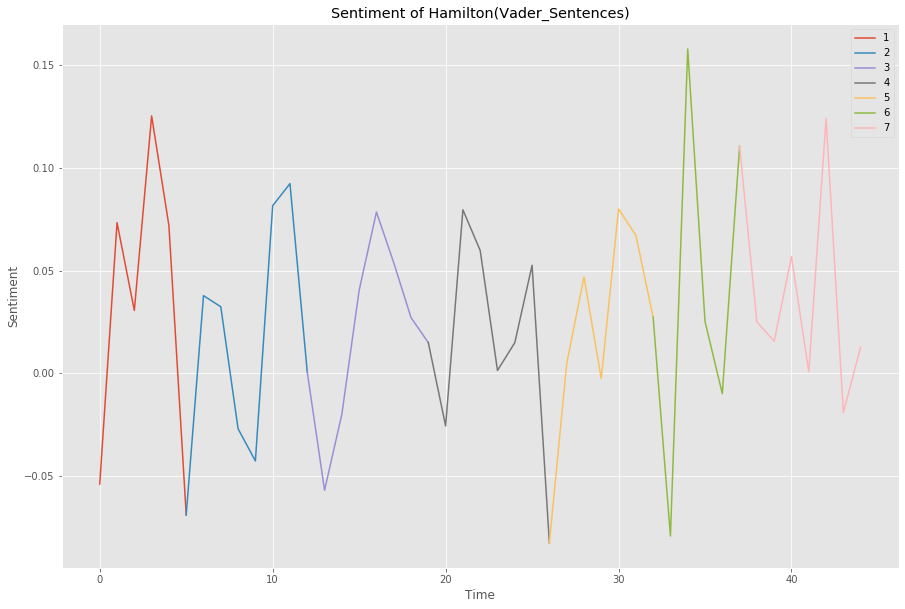

In [21]:
x = range(len(sens1))
y = sens1
plt.figure(figsize=(15, 10))
index = 0
lb = 1
while(lb<=7):
    sn = l_sdic[lb]
    if(index == 0):
        plt.plot(x[index:index+len(sn)],y[index:index+len(sn)],label=lb)
    else:
        plt.plot(x[index-1:index+len(sn)],y[index-1:index+len(sn)],label=lb)
    index = index + len(sn)
    lb = lb + 1
    
plt.legend(loc='best')
plt.title('Sentiment of Hamilton(Vader_Sentences)')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

In [22]:
i = 0
for i in range(len(sen2)):
    print("{:-<50} {}".format(allsongs[i], str(sens1[i])[:5]))

Alexander Hamilton-------------------------------- -0.05
Aaron Burr, Sir----------------------------------- 0.073
My Shot------------------------------------------- 0.030
The Story of Tonight------------------------------ 0.125
The Schuyler Sisters------------------------------ 0.071
Farmer Refuted------------------------------------ -0.06
You'll Be Back------------------------------------ 0.037
Right Hand Man------------------------------------ 0.032
A Winter's Ball----------------------------------- -0.02
Helpless------------------------------------------ -0.04
Satisfied----------------------------------------- 0.081
The Story of Tonight (Reprise)-------------------- 0.092
Wait For It--------------------------------------- 0.000
Stay Alive---------------------------------------- -0.05
Ten Duel Commandments----------------------------- -0.01
Meet Me Inside------------------------------------ 0.040
That Would Be Enough------------------------------ 0.078
Guns and Ships-----------------

### 将neg/pos分开看

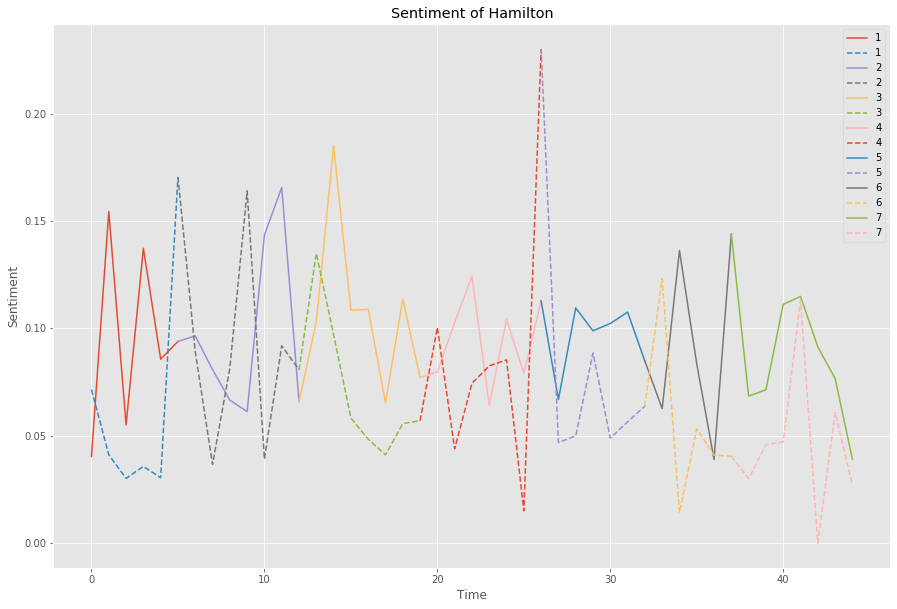

In [23]:
x = range(len(allsongs))
y1 = sentis["pos"]
y2 = sentis["neg"]
plt.figure(figsize=(15, 10))
# plt.plot(x,y1,c=sns.xkcd_rgb['coral'],label=lb)
index = 0
lb = 1
while(lb<=7):
    sn = l_sdic[lb]
    if(index == 0):
        plt.plot(x[index:index+len(sn)],y1[index:index+len(sn)],label=lb)
        plt.plot(x[index:index+len(sn)],y2[index:index+len(sn)],'--',label=lb)
    else:
        plt.plot(x[index-1:index+len(sn)],y1[index-1:index+len(sn)],label=lb)
        plt.plot(x[index-1:index+len(sn)],y2[index-1:index+len(sn)],'--',label=lb)
    index = index + len(sn)
    lb = lb + 1
    
plt.legend(loc='best')
plt.title('Sentiment of Hamilton')
plt.xlabel('Time')
plt.ylabel('Sentiment')
plt.show()

### Helpless?

In [24]:
analyzer = SentimentIntensityAnalyzer()
sdf = df[df["title"] == "Helpless"]
for indexs in sdf.index:
    a = str(sdf.loc[indexs]["lines"])
    vs = analyzer.polarity_scores(a)
    if(vs['neg']>0.5):
        print("{:-<50} {}".format(sdf.loc[indexs]["lines"], str(vs['neg'])[:5]))

Helpless!----------------------------------------- 1.0
Helpless!----------------------------------------- 1.0
I'm helpless-------------------------------------- 0.75
I'm helpless-------------------------------------- 0.75
Helpless! ---------------------------------------- 1.0
Helpless!----------------------------------------- 1.0
I'm helpless-------------------------------------- 0.75
Helpless------------------------------------------ 1.0
I'm helpless!------------------------------------- 0.767
I'm helpless-------------------------------------- 0.75
Helpless, helpless-------------------------------- 1.0
Helpless!----------------------------------------- 1.0
Helpless!----------------------------------------- 1.0
Helpless!----------------------------------------- 1.0
Helpless!----------------------------------------- 1.0
Helpless!----------------------------------------- 1.0
Helpless!----------------------------------------- 1.0
Helpless------------------------------------------ 1.0


   在剧中，Helpless描述了女主人公在见过男主后，对男主一见倾心的情景，所以这应该是一首甜度很高的歌。有的字幕组直接把剧中出现的“Helpless”翻译成了“意乱情迷”。然而在用vader和textblob时，均显示helpless是一首负面情绪较强的歌。其原因可能是，在语料库中，helpless更多被解释为“无助的”、“无所依靠的”，并且歌词中的反复重复也增加了这种情感的强度。所以这首的分析出现了偏差。

## Emotions

从anger anticipation disgust fear joy sadness surprise trust多个角度看一下文本

In [25]:
import pandas as pd
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [26]:
data = {'label': [], 'song': [], 'lines': []}

la = 1
while(la<=7):
    for title in l_sdic[la]:
        text = str(ham[title])
        data['label'].append(la)
        data['song'].append(title)
        data['lines'].append(text)
    la += 1
ham_df = pd.DataFrame(data=data)

In [27]:
filepath = "NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
# emotions = emolex_df.emotion.unique()

# reshape
emolex_words = emolex_df.pivot(index='word',columns='emotion',values='association').reset_index()
emotions = emolex_words.columns.drop('word')
emo_df = pd.DataFrame(0, index=ham_df.index, columns=emotions)

stemmer = SnowballStemmer("english")

In [28]:
label = ''
song = ''

for index,row in ham_df.iterrows():
    if row['label'] != label:
        print(row['label'])
        label = row['label']
    if row['song'] != song:
        print('   ', row['song'])
        song = row['song']
    lyrics = word_tokenize(ham_df.loc[index]["lines"])
    for word in lyrics:
        word = stemmer.stem(word.lower())
        emo_score = emolex_words[emolex_words.word == word]
        if not emo_score.empty:
            for emotion in list(emotions):
                    emo_df.at[index, emotion] += emo_score[emotion]


1
    Alexander Hamilton
    Aaron Burr, Sir
    My Shot
    The Story of Tonight
    The Schuyler Sisters
    Farmer Refuted
2
    You'll Be Back
    Right Hand Man
    A Winter's Ball
    Helpless
    Satisfied
    The Story of Tonight (Reprise)
    Wait For It
3
    Stay Alive
    Ten Duel Commandments
    Meet Me Inside
    That Would Be Enough
    Guns and Ships
    History Has Its Eyes On You
    Yorktown (The World Turned Upside Down)
4
    What Comes Next?
    Dear Theodosia
    Non-Stop
    What'd I Miss
    Cabinet Battle #1
    Take A Break
    Say No To This
5
    The Room Where It Happens
    Schuyler Defeated
    Cabinet Battle #2
    Washington On Your Side
    One Last Time
    I Know Him
6
    The Adams Administration
    We Know
    Hurricane
    Burn
    Blow Us All Away
7
    Stay Alive (Reprise)
    It's Quiet Uptown
    The Election of 1800
    Your Obedient Servant
    Best of Wives and Best of Women
    The World Was Wide Enough
    Who Lives, Who Dies, Who Tell

In [29]:
ham_df = pd.concat([ham_df, emo_df], axis=1)

In [30]:
ham_df['word_count'] = ham_df['lines'].apply(tokenize.word_tokenize).apply(len)
for emotion in emotions:
    ham_df[emotion] = ham_df[emotion] / ham_df['word_count']

查看每首歌的主要情感色彩

In [31]:
for i in range(len(ham_df)):
    print(allsongs[i])
    emo = ham_df.iloc[i][3:13].values
    emo[5] = emo[6] = 0
    for j in range(3):
        l_e = emo.tolist()
        index = l_e.index(max(l_e))
        print("     {:-<20}{}".format(emotions[index],str(int(max(l_e)*1000)/1000)))
        emo[index] = 0

Alexander Hamilton
     anticipation--------0.035
     sadness-------------0.028
     trust---------------0.028
Aaron Burr, Sir
     trust---------------0.029
     anticipation--------0.021
     fear----------------0.018
My Shot
     fear----------------0.043
     sadness-------------0.042
     anger---------------0.041
The Story of Tonight
     joy-----------------0.029
     anticipation--------0.019
     trust---------------0.019
The Schuyler Sisters
     anticipation--------0.015
     fear----------------0.012
     anger---------------0.009
Farmer Refuted
     fear----------------0.05
     disgust-------------0.038
     trust---------------0.035
You'll Be Back
     joy-----------------0.027
     anger---------------0.021
     fear----------------0.021
Right Hand Man
     fear----------------0.043
     trust---------------0.038
     surprise------------0.028
A Winter's Ball
     anticipation--------0.025
     joy-----------------0.025
     trust---------------0.025
Helpless
     fear

In [32]:
ham_df

,label,song,lines,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,word_count
0,1,Alexander Hamilton,"How does a bastard, orphan, son of a whore and...",0.009390,0.035994,0.009390,0.017214,0.014085,0.050078,0.028169,0.028169,0.004695,0.028169,639
1,1,"Aaron Burr, Sir",1776. New York City Pardon me. Are you Aaron B...,0.003630,0.021779,0.007260,0.018149,0.012704,0.030853,0.041742,0.014519,0.014519,0.029038,551
2,1,My Shot,I am not throwing away my shot! I am not throw...,0.041481,0.021481,0.003704,0.043704,0.013333,0.045926,0.031852,0.042222,0.040000,0.014815,1350
3,1,The Story of Tonight,I may not live to see our glory! I may not liv...,0.009709,0.019417,0.000000,0.009709,0.029126,0.009709,0.038835,0.000000,0.000000,0.019417,206
4,1,The Schuyler Sisters,There's nothing rich folks love more Than goin...,0.009736,0.015299,0.005563,0.012517,0.006954,0.013908,0.012517,0.006954,0.005563,0.006954,719
5,1,Farmer Refuted,"Hear ye, hear ye! My name is Samuel Seabury An...",0.014925,0.014925,0.038806,0.050746,0.017910,0.038806,0.053731,0.026866,0.017910,0.035821,335
6,2,You'll Be Back,You say The price of my love's not a price tha...,0.021680,0.008130,0.005420,0.021680,0.027100,0.040650,0.029810,0.016260,0.005420,0.010840,369
7,2,Right Hand Man,British Admiral Howe's got troops on the water...,0.017513,0.018389,0.007881,0.043783,0.014011,0.049912,0.073555,0.012259,0.028897,0.038529,1142
8,2,A Winter's Ball,"How does the bastard, orphan, son of a whore G...",0.006369,0.025478,0.012739,0.019108,0.025478,0.038217,0.031847,0.012739,0.000000,0.025478,157
9,2,Helpless,"Hey hey hey hey Ohh, I do I do I do I Hey hey ...",0.006565,0.010941,0.003282,0.035011,0.010941,0.045952,0.039387,0.030635,0.003282,0.027352,914


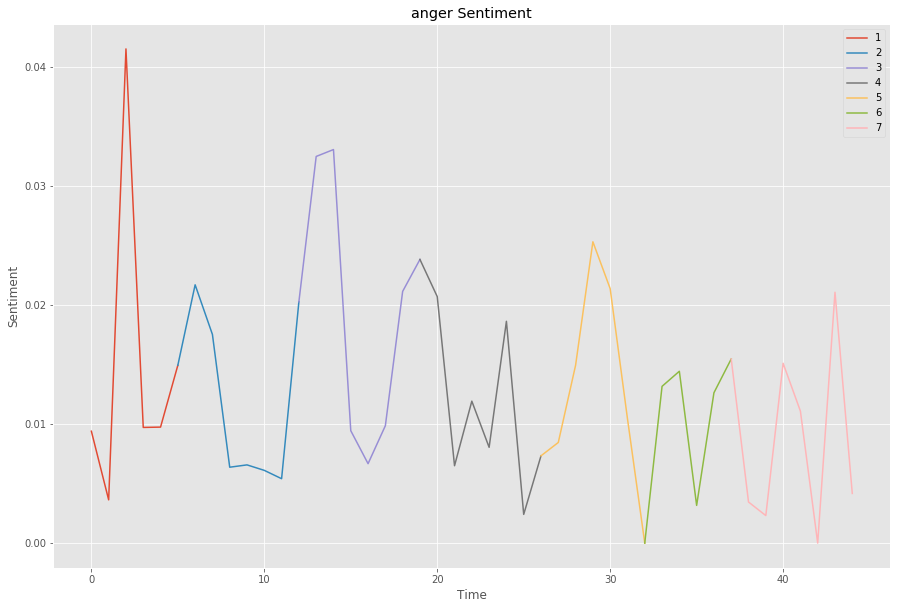

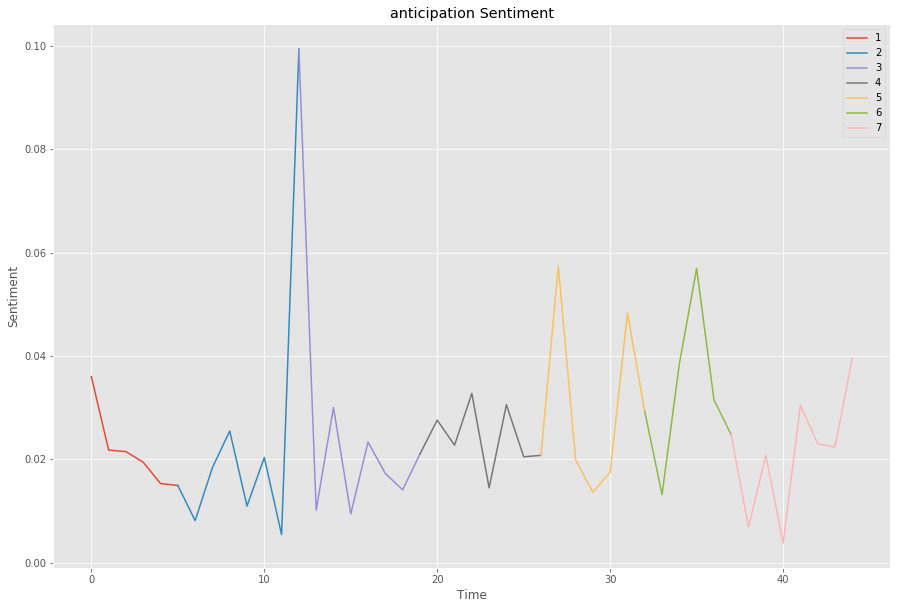

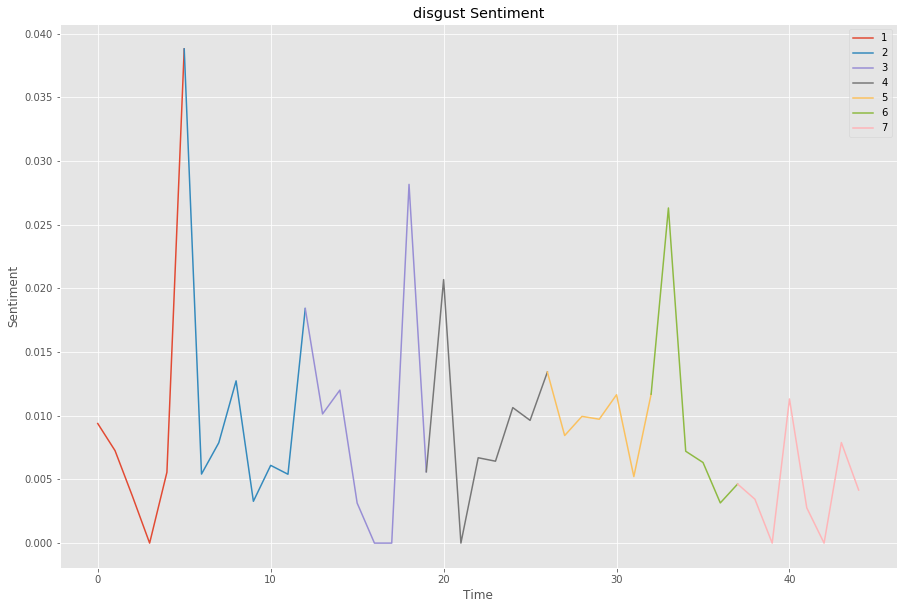

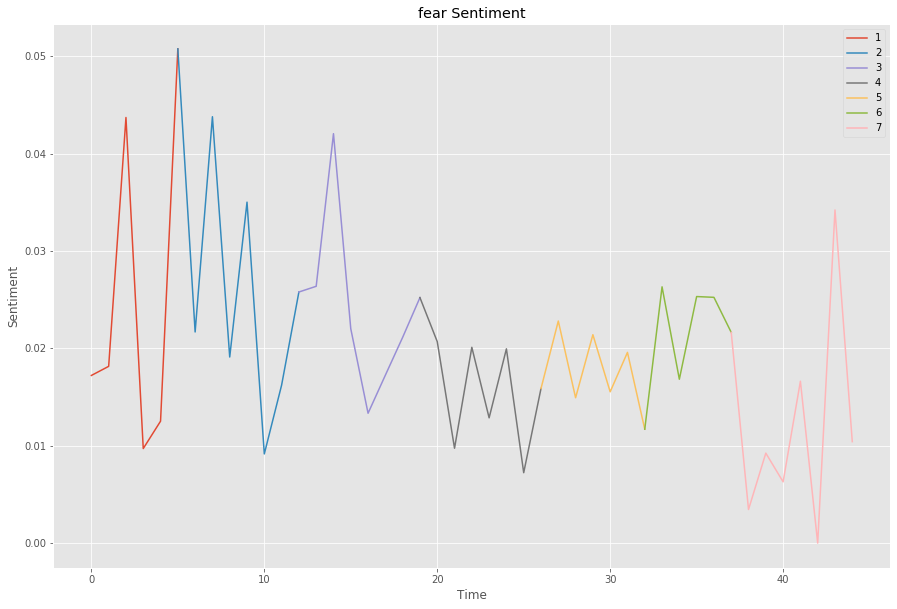

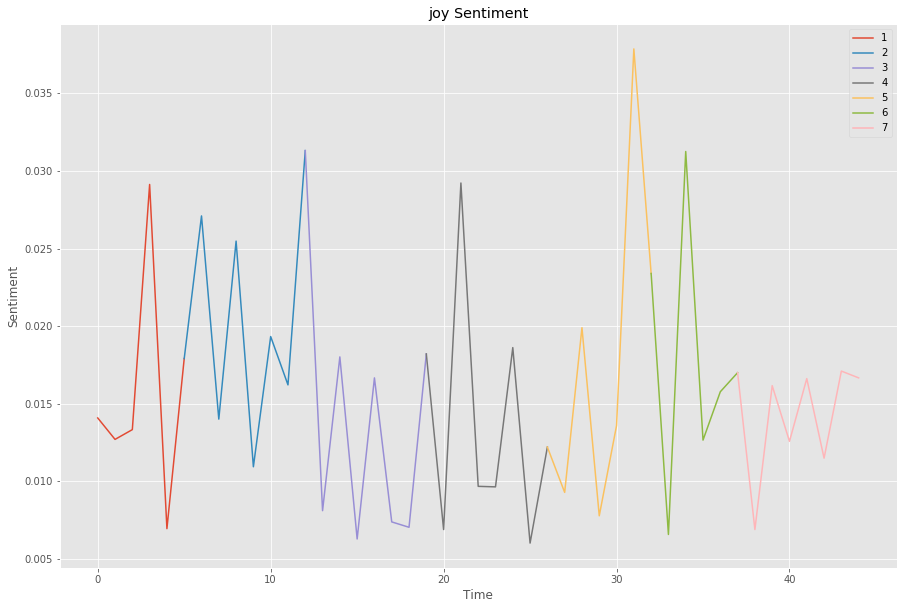

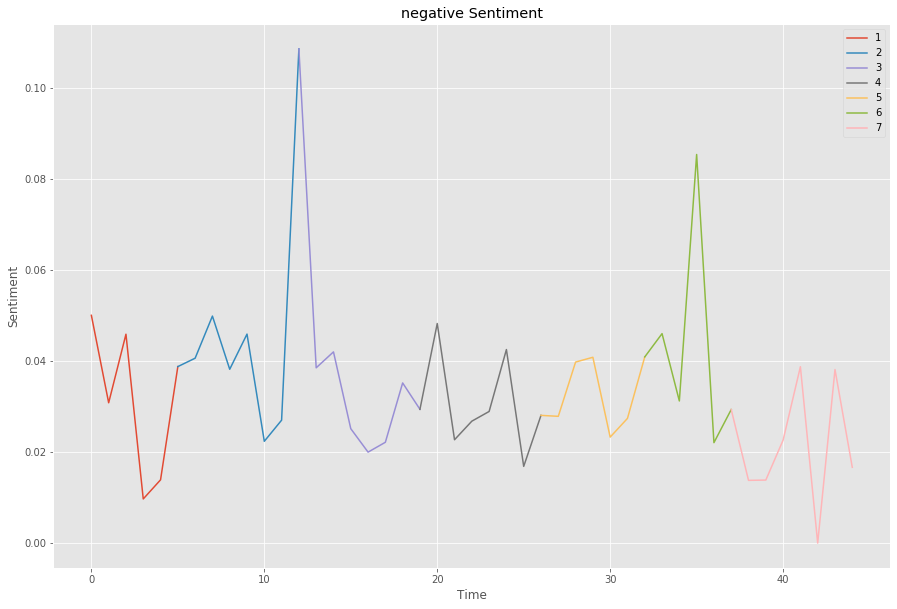

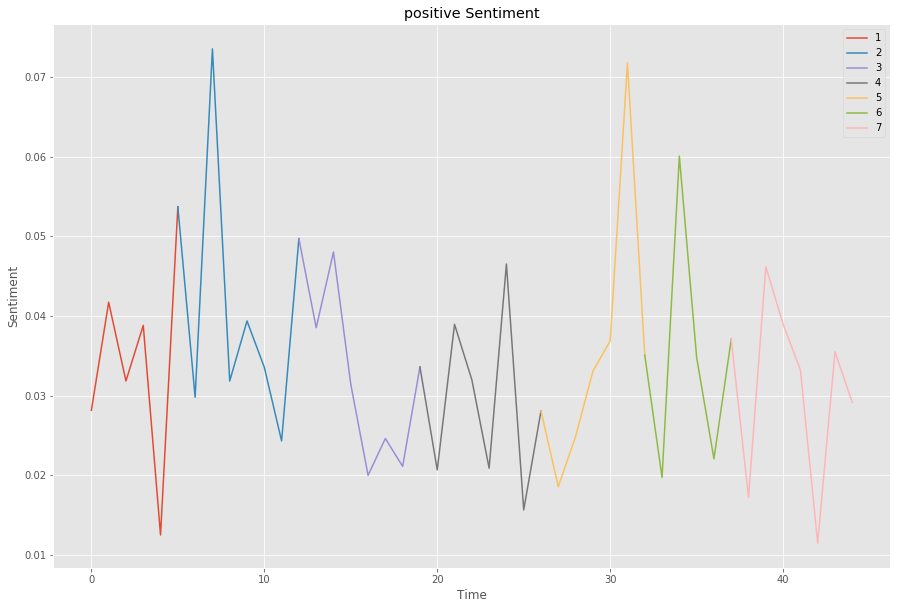

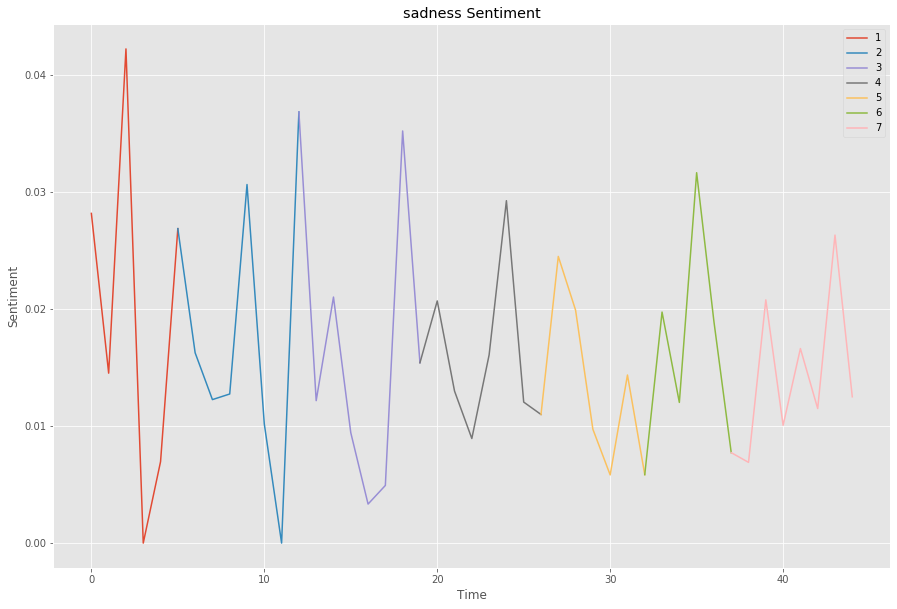

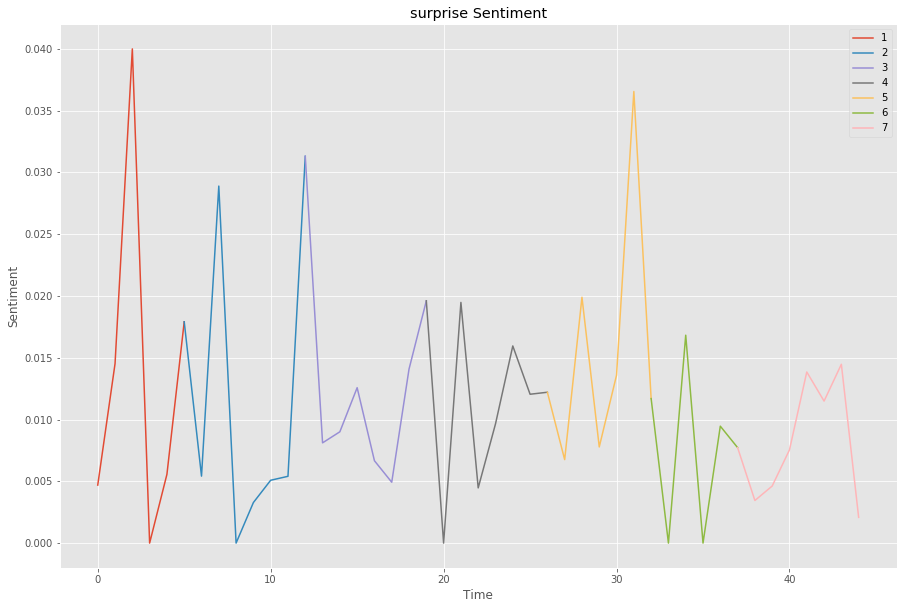

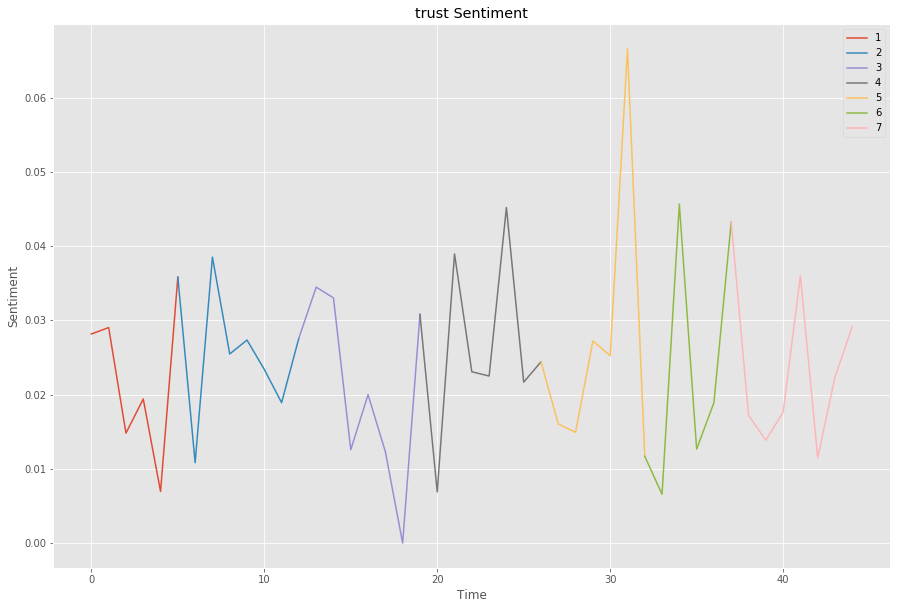

In [33]:
x = range(len(allsongs))

for emotion in emotions:
    
    y = ham_df.loc[:,emotion].values

    plt.figure(figsize=(15, 10))
    index = 0
    lb = 1
    while(lb<=7):
        sn = l_sdic[lb]
        if(index == 0):
            plt.plot(x[index:index+len(sn)],y[index:index+len(sn)],label=lb)
        else:
            plt.plot(x[index-1:index+len(sn)],y[index-1:index+len(sn)],label=lb)
        index = index + len(sn)
        lb = lb + 1
    plt.legend(loc='best')
    plt.title('{} Sentiment'.format(emotion))
    plt.xlabel('Time')
    plt.ylabel('Sentiment')
    plt.show()

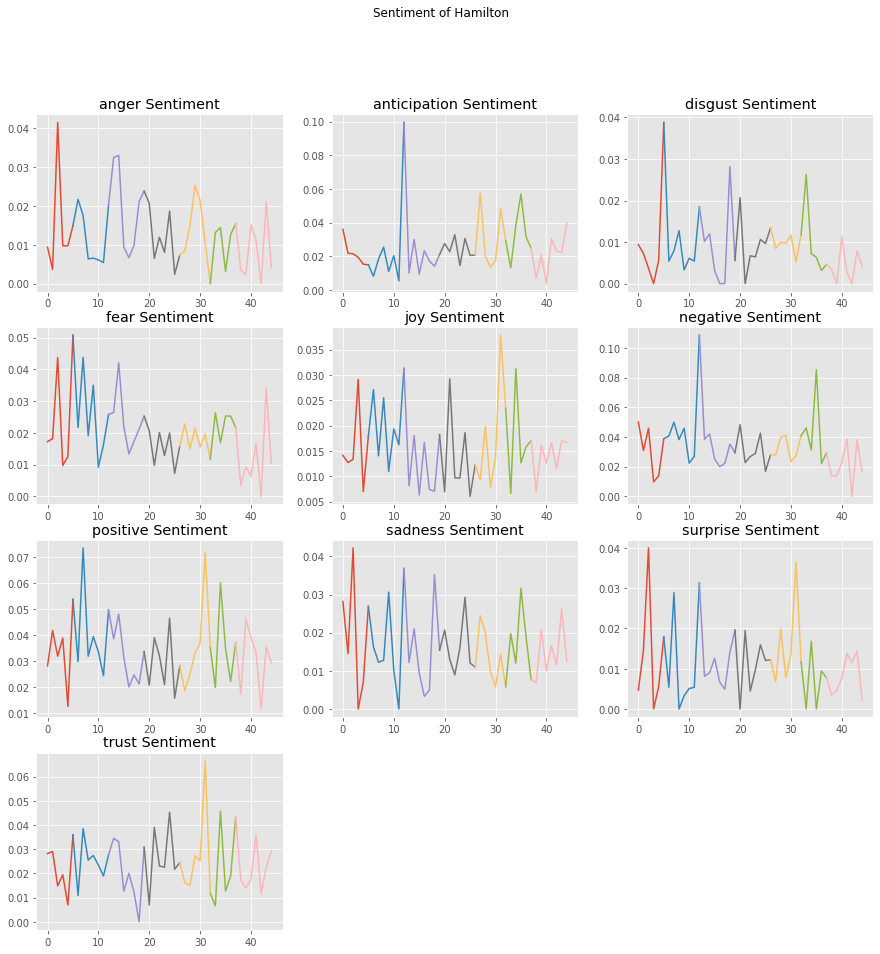

In [34]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
fig.suptitle('Sentiment of Hamilton')

ax = ax.ravel()

x = range(len(allsongs))
i = 0
for emotion in emotions:
    y = ham_df.loc[:,emotion].values
    index = 0
    lb = 1
    while(lb<=7):
        sn = l_sdic[lb]
        if(index == 0):
            ax[i].plot(x[index:index+len(sn)],y[index:index+len(sn)],label=lb)
        else:
            ax[i].plot(x[index-1:index+len(sn)],y[index-1:index+len(sn)],label=lb)
        index = index + len(sn)
        lb = lb + 1
    ax[i].set_title('{} Sentiment'.format(emotion))
    i = i + 1

fig.delaxes(ax[-1])
fig.delaxes(ax[-2])
plt.show()

My Shot?

In [35]:
emolex_words[emolex_words.word == 'shot']

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
11381,shot,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [36]:
emolex_words[emolex_words.word == 'helpless']

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
5914,helpless,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


In [37]:
emolex_words[emolex_words.word == 'wait']

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
13815,wait,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


在根据情绪进行多分类后，可以发现一些更有意思的内容：
（Spoiler Alert!）
1. 全剧trust和joy的最高点出现在了One Last Time,即华盛顿决定卸任归乡的退休歌。

  可以说这是唯一一首，在歌词中引用大篇幅真实历史人物发表过的文字的歌曲。
“Everyone shall sit under their own vine and fig tree，And no one shall make them afraid.”华盛顿终于跑完了当跑的路，打完了美好的仗。


2. 多义词引起的分析偏差：

  前面提到了helpless，我们不难发现在NRC的词典里同样也存在这个问题。在情绪分类中，我们把helpless分到了 fear/sadness/negative的范畴，放到剧情中，这无疑是有问题的。

  还有一首歌和实际偏差比较大，“My Shot”--“I am not throwing away my shot!”根据剧情，shot在这里和“机会”的意思更为接近，然而词典中的shot似乎只考虑了“枪击”这一含义。这首歌是充满了想要打出一番天地、翻身做主人的血气方刚的。换句话说，这是一首很燃的歌，所以并不符合"fear/sadness"的分析结果。
  
  此外，作为一个身无分文的孤儿和移民者，Hamilton勇于抓住shot是他成功的关键之一。根据剧情发展，我们会发现shot在剧中被多次提及，而根据上下文的不同，其隐喻也有所差异。Hamilton这个人物，也由“Do not throw away your shot”转变到“He aims his pistol at the sky”。在第二幕，shot回归为“开枪”的意思，Hamilton和他的儿子均在决斗中因中弹身亡。可以说，这个词也是Hamilton一生的简照。而对于这个词如果只用一个单调的分类标准，是不准确的。
  
  
3. 情绪与人物：

  anticipation最高的两首歌“Wait For It”和“The Room Where It Happens”，均是这个剧的另一个男主人公Burr的solo，也是全剧的高光时刻。Burr这个角色与 Hamilton有着奇妙的匹敌关系,结局又是二人的最极端最戏剧的碰撞。Burr在第一幕中冷眼旁观，第二幕决定参与其中，他能力出众、充满野心，但也败给了自己的毫无立场。如果说shot是ham的关键词，那么wait则可以说是Burr的关键词。
  